### **Model Evaluation and Analysis Notebook**
This notebook provides comprehensive evaluation of the trained emotion detection model on the FER2013 test dataset, including performance metrics, confusion matrix analysis, and misclassification visualization.

---

#### **Import Required Libraries**
Essential imports for data manipulation, visualization, and model evaluation metrics.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from src.model import build_model
from src.data_loader import get_data_generators

---
#### **Load Trained Model**
Initialize the model architecture and load the pre-trained weights for evaluation.
The model summary displays the layer architecture and parameter count.

In [ ]:
model = build_model()
model.load_weights("model\emotion_detector.h5")
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_11 (Ba  (None, 48, 48, 64)        256       
 tchNormalization)                                               
                                                                 
 activation_11 (Activation)  (None, 48, 48, 64)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 48, 48, 64)        36928     
                                                                 
 batch_normalization_12 (Ba  (None, 48, 48, 64)        256       
 tchNormalization)                                               
                                                                 
 activation_12 (Activation)  (None, 48, 48, 64)       

---
#### **Model Performance Evaluation**
Quantitative assessment of model performance on the test dataset.
Calculates overall accuracy and loss to establish baseline performance metrics.

In [4]:
train_gen, val_gen, test_gen, class_weight_dict = get_data_generators(batch_size=64)
loss, accuracy = model.evaluate(test_gen, verbose=1)

print(f"Test Accuracy: {accuracy*100:.2f}%")
print(f"Test Loss: {loss:.4f}")

Found 24406 images belonging to 7 classes.
Found 4303 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
113/113 [==============================] - 130s 1s/step - loss: 1.1089 - accuracy: 0.6613
Test Accuracy: 66.13%
Test Loss: 1.1089


---
#### **Test Data Preparation**
Extract and stack test batches for comprehensive prediction analysis.
Generate predictions and convert probability outputs to class labels for detailed evaluation.

In [5]:
x_test, y_test = [], []
for i in range(len(test_gen)):
    xb, yb = test_gen[i]
    x_test.append(xb)
    y_test.append(yb)

x_test = np.vstack(x_test)
y_test = np.vstack(y_test)

y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

225/225 [==============================] - 23s 101ms/step


---
#### **Classification Report**
Display class indices mapping and generate detailed classification report.
Includes precision, recall, and F1-score for each emotion class to identify performance variations across categories.

In [6]:
class_indices = test_gen.class_indices

for k, v in class_indices.items():
    print(f"{k}: {v}", end=", ")

print("\n\nClassification Report:")
print(classification_report(y_true, y_pred))

angry: 0, disgust: 1, fear: 2, happy: 3, neutral: 4, sad: 5, surprise: 6, 

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.64      0.59       958
           1       0.55      0.67      0.60       111
           2       0.56      0.35      0.43      1024
           3       0.92      0.83      0.87      1774
           4       0.56      0.74      0.64      1233
           5       0.56      0.51      0.53      1247
           6       0.72      0.84      0.78       831

    accuracy                           0.66      7178
   macro avg       0.63      0.65      0.63      7178
weighted avg       0.67      0.66      0.66      7178



---
#### **Confusion Matrix Visualization**
Heatmap representation of model predictions versus true labels.
Identifies patterns in misclassifications and reveals which emotion pairs are most frequently confused.

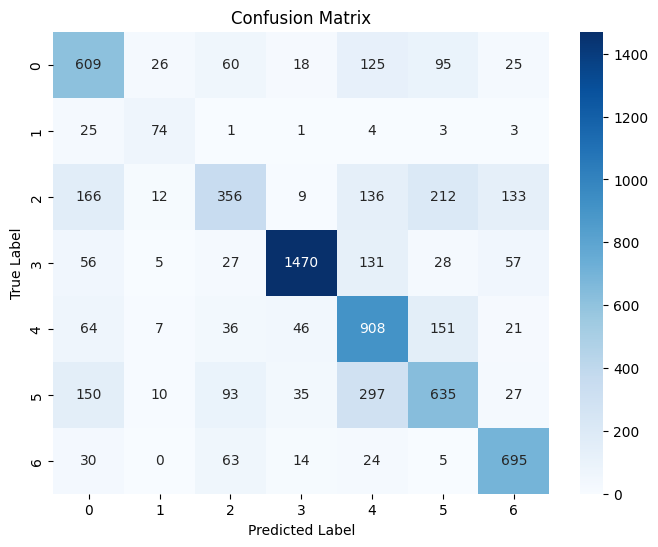

In [8]:
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

---
#### **Misclassification Analysis**
Visual examination of incorrectly classified samples.
Provides insights into challenging cases and potential limitations of the model in distinguishing specific emotional expressions.

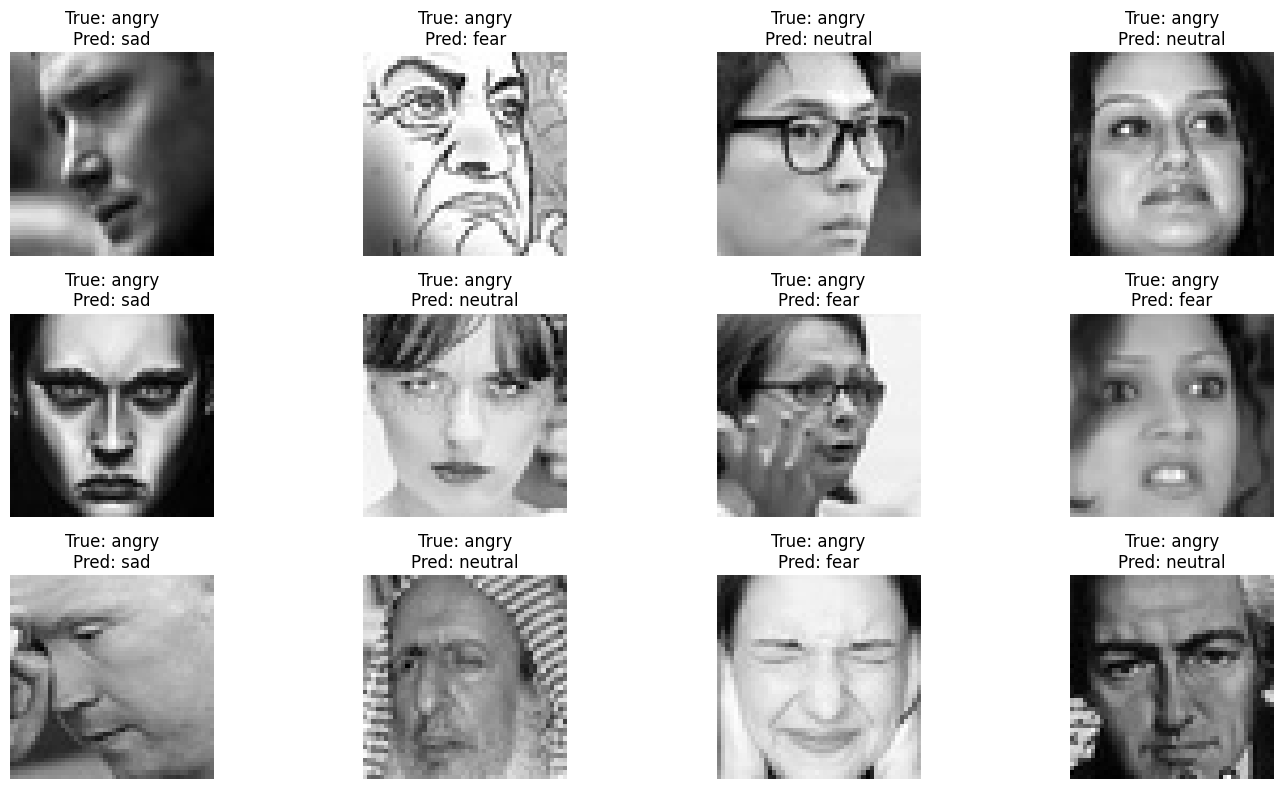

In [10]:
classes = list(class_indices.keys())

misclassified_idx = np.where(y_pred != y_true)[0]

num_mis = len(misclassified_idx)
num_to_show = min(12, num_mis)  

plt.figure(figsize=(15, 8))

for i in range(num_to_show):
    idx = misclassified_idx[i]
    plt.subplot(3, 4, i+1)
    plt.imshow(x_test[idx].reshape(48,48), cmap="gray")
    plt.title(f"True: {classes[y_true[idx]]}\nPred: {classes[y_pred[idx]]}")
    plt.axis("off")

plt.tight_layout()
plt.show()

#### **Author**
- Github: https://github.com/BraveVahid
- Email: vahidsiyami.dev@gmail.com
- Telegram: https://t.me/BraveVahid